In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_paths = {
    "Newsletter Interaction": "Newsletter_Interaction_Data.csv",
    "Product Bug Task": "Product_Bug_Task_Data.csv",
    "Region and Vertical": "RegionAndVertical_Data.csv",
    "Status and Level": "StatusAndLevel_Data.csv",
    "CSAT Survey": "CSAT_Survey_Data.csv",
    "Customer Age": "Customer_Age_Data.csv",
    "Customer MRR": "Customer_MRR_Data.csv",
    "Customer Revenue": "Customer_Revenue_Data.csv",
    "Help Ticket": "Help_Ticket_Data.csv",
}

In [4]:
dataframes = {name: pd.read_csv(f"archive/{path}") for name, path in file_paths.items()}

In [5]:
dataframes["Customer Age"].rename(columns={"CRM ID": "Customer ID"}, inplace=True)

In [6]:
def clean_currency(value):
    if isinstance(value, str):
        return float(value.replace('$', '').replace(',', ''))
    return value

dataframes["Customer MRR"]["MRR"] = dataframes["Customer MRR"]["MRR"].apply(clean_currency)
dataframes["Customer Revenue"]["Total Revenue"] = dataframes["Customer Revenue"]["Total Revenue"].apply(clean_currency)

In [ ]:
for name, df in dataframes.items():
    print(f"{name} veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±:", df["Customer ID"].nunique())
    print(f"{name} veri setinde toplam satƒ±r sayƒ±sƒ±:", len(df))

üìå Newsletter Interaction veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 251
‚û°Ô∏è Newsletter Interaction veri setinde toplam satƒ±r sayƒ±sƒ±: 251
üìå Product Bug Task veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 640
‚û°Ô∏è Product Bug Task veri setinde toplam satƒ±r sayƒ±sƒ±: 1989
üìå Region and Vertical veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 2651
‚û°Ô∏è Region and Vertical veri setinde toplam satƒ±r sayƒ±sƒ±: 2655
üìå Status and Level veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 2651
‚û°Ô∏è Status and Level veri setinde toplam satƒ±r sayƒ±sƒ±: 2655
üìå CSAT Survey veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 640
‚û°Ô∏è CSAT Survey veri setinde toplam satƒ±r sayƒ±sƒ±: 1989
üìå Customer Age veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 2651
‚û°Ô∏è Customer Age veri setinde toplam satƒ±r sayƒ±sƒ±: 2651
üìå Customer MRR veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 1380
‚û°Ô∏è Customer MRR veri setinde toplam satƒ±r sayƒ±sƒ±: 1380
üìå Customer Revenue veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 901
‚û°Ô∏è Customer

In [8]:
print(dataframes["CSAT Survey"].columns)

Index(['Customer ID', 'Year', 'Quarter', 'Survey Date', 'Response Date',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel',
       'Please rate your understanding of our reporting capabilities in the panel'],
      dtype='object')


In [9]:
dataframes["Product Bug Task"] = dataframes["Product Bug Task"].groupby("Customer ID", as_index=False)["Product Bug Task Count"].sum()

csat_columns = [
    "How likely are you to recommend insider to a friend or colleague ",
    "How would you rate the value you gain from our company",
    "Please rate the overall quality of our products",
    "Please rate the usability of the panel"
]
dataframes["CSAT Survey"] = dataframes["CSAT Survey"].groupby("Customer ID", as_index=False)[csat_columns].mean()

dataframes["Region and Vertical"] = dataframes["Region and Vertical"].groupby("Customer ID").agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]).reset_index()

dataframes["Status and Level"] = dataframes["Status and Level"].groupby("Customer ID").agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]).reset_index()

In [10]:
merged_df = dataframes["Customer Age"]

for key, df in dataframes.items():
    if key != "Customer Age":  # Zaten ba≈ülangƒ±√ß noktasƒ± olarak kullanƒ±yoruz
        merged_df = merged_df.merge(df, on="Customer ID", how="left")

In [11]:
print("Merged Satƒ±r Sayƒ±sƒ±:", len(merged_df))

print("Unique Customer ID Sayƒ±sƒ±:", merged_df["Customer ID"].nunique())

for name, df in dataframes.items():
    print(f"{name} veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±:", df["Customer ID"].nunique())
    print(f"{name} veri setinde toplam satƒ±r sayƒ±sƒ±:", len(df))


Merged Satƒ±r Sayƒ±sƒ±: 2651
Unique Customer ID Sayƒ±sƒ±: 2651
Newsletter Interaction veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 251
Newsletter Interaction veri setinde toplam satƒ±r sayƒ±sƒ±: 251
Product Bug Task veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 640
Product Bug Task veri setinde toplam satƒ±r sayƒ±sƒ±: 640
Region and Vertical veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 2651
Region and Vertical veri setinde toplam satƒ±r sayƒ±sƒ±: 2651
Status and Level veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 2651
Status and Level veri setinde toplam satƒ±r sayƒ±sƒ±: 2651
CSAT Survey veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 640
CSAT Survey veri setinde toplam satƒ±r sayƒ±sƒ±: 640
Customer Age veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 2651
Customer Age veri setinde toplam satƒ±r sayƒ±sƒ±: 2651
Customer MRR veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 1380
Customer MRR veri setinde toplam satƒ±r sayƒ±sƒ±: 1380
Customer Revenue veri setinde e≈üsiz m√º≈üteri sayƒ±sƒ±: 901
Customer Revenue veri setinde toplam satƒ±r

In [12]:
missing_values = merged_df.isnull().sum()
missing_percentage = (missing_values / len(merged_df)) * 100

missing_df = pd.DataFrame({"Eksik Deƒüer Sayƒ±sƒ±": missing_values, "Eksik Veri (%)": missing_percentage})
missing_df = missing_df[missing_df["Eksik Deƒüer Sayƒ±sƒ±"] > 0]  

print("\nEksik Veri Analizi:")
print(missing_df)



Eksik Veri Analizi:
                                                    Eksik Deƒüer Sayƒ±sƒ±  \
Company Newsletter Interaction Count                              2400   
Product Bug Task Count                                            2013   
Region                                                               1   
Vertical                                                            66   
Subvertical                                                        102   
Customer Level                                                       1   
How likely are you to recommend insider to a fr...                2013   
How would you rate the value you gain from our ...                2013   
Please rate the overall quality of our products                   2013   
Please rate the usability of the panel                            2018   
MRR                                                               1319   
Total Revenue                                                     1750   
Help Ticket Co

In [13]:
merged_df["Company Newsletter Interaction Count"] = merged_df["Company Newsletter Interaction Count"].fillna(0)
merged_df["Product Bug Task Count"] = merged_df["Product Bug Task Count"].fillna(0)
csat_columns = [
    "How likely are you to recommend insider to a friend or colleague ",
    "How would you rate the value you gain from our company",
    "Please rate the overall quality of our products",
    "Please rate the usability of the panel"
]

numeric_cols = merged_df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())
merged_df["MRR"] = merged_df["MRR"].fillna(0)
merged_df["Total Revenue"] = merged_df["Total Revenue"].fillna(0)
merged_df["Help Ticket Count"] =merged_df["Help Ticket Count"].fillna(0)
merged_df["Help Ticket Lead Time (hours)"]=merged_df["Help Ticket Lead Time (hours)"].fillna(0)
categorical_columns = ["Region", "Vertical", "Subvertical", "Customer Level"]

for col in categorical_columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])  

In [14]:
print(merged_df.isnull().sum())

Customer ID                                                          0
Customer Age (Months)                                                0
Company Newsletter Interaction Count                                 0
Product Bug Task Count                                               0
Region                                                               0
Vertical                                                             0
Subvertical                                                          0
Status                                                               0
Customer Level                                                       0
How likely are you to recommend insider to a friend or colleague     0
How would you rate the value you gain from our company               0
Please rate the overall quality of our products                      0
Please rate the usability of the panel                               0
MRR                                                                  0
Total 

Veri Seti Temizlendi

In [ ]:
print(merged_df.describe())

       Customer Age (Months)  Company Newsletter Interaction Count  \
count            2651.000000                           2651.000000   
mean               20.077707                              0.417955   
std                16.427542                              2.096620   
min                 1.000000                              0.000000   
25%                 7.000000                              0.000000   
50%                15.000000                              0.000000   
75%                27.000000                              0.000000   
max                72.000000                             54.000000   

       Product Bug Task Count  \
count             2651.000000   
mean               105.884949   
std                236.127209   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max               1665.000000   

       How likely are you to recommend insider to a friend or colleague

In [17]:
print(merged_df.dtypes)

Customer ID                                                           object
Customer Age (Months)                                                  int64
Company Newsletter Interaction Count                                 float64
Product Bug Task Count                                               float64
Region                                                                object
Vertical                                                              object
Subvertical                                                           object
Status                                                                object
Customer Level                                                        object
How likely are you to recommend insider to a friend or colleague     float64
How would you rate the value you gain from our company               float64
Please rate the overall quality of our products                      float64
Please rate the usability of the panel                               float64

<Figure size 1200x800 with 0 Axes>

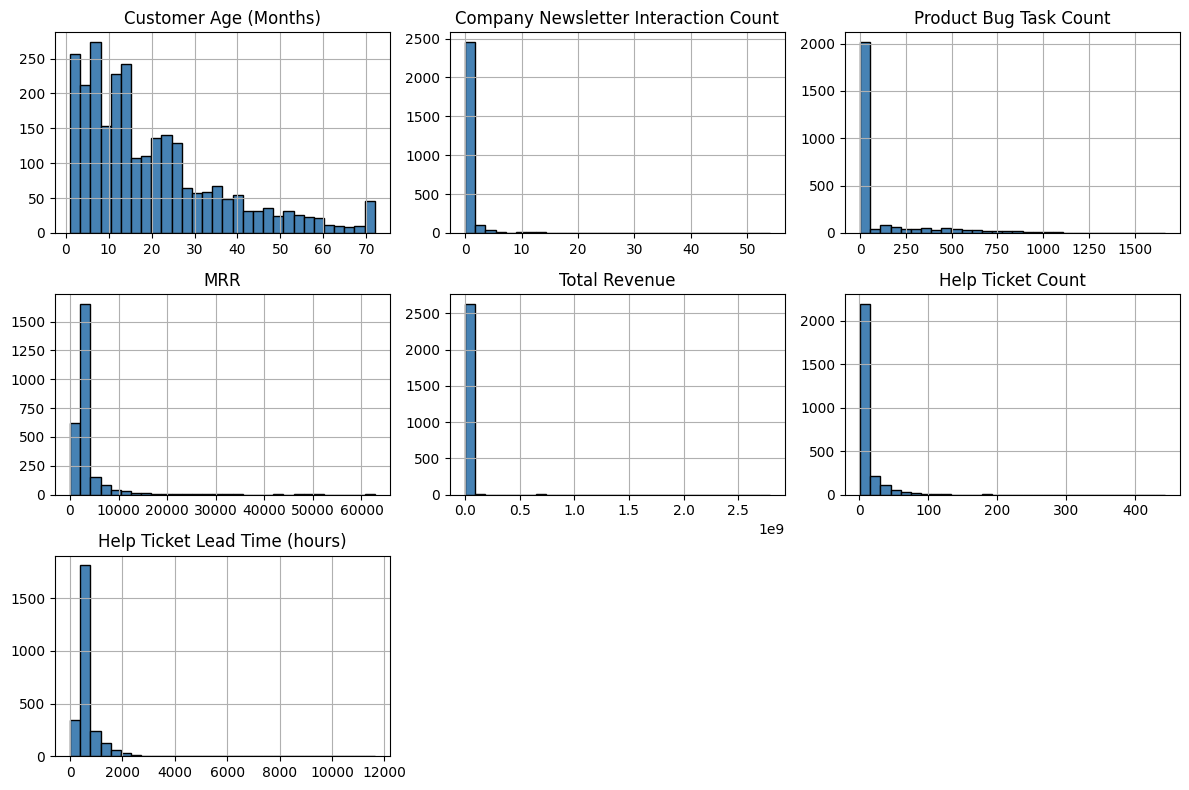

In [18]:
numeric_columns = ["Customer Age (Months)", "Company Newsletter Interaction Count", 
                   "Product Bug Task Count", "MRR", "Total Revenue", 
                   "Help Ticket Count", "Help Ticket Lead Time (hours)"]

plt.figure(figsize=(12, 8))
merged_df[numeric_columns].hist(bins=30, figsize=(12, 8), layout=(3, 3), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()


In [19]:
plt.figure(figsize=(12, 8))
numeric_columns = ["MRR", "Total Revenue", "Help Ticket Count", "Help Ticket Lead Time (hours)"]

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=merged_df[col])
    plt.title(f"{col} - Boxplot")

plt.tight_layout()
plt.show()

In [ ]:
outlier_thresholds = {}

numeric_columns = ["MRR", "Total Revenue", "Help Ticket Count", "Help Ticket Lead Time (hours)"]

for col in numeric_columns:
    q99 = merged_df[col].quantile(0.99)  
    outlier_thresholds[col] = q99
    print(f"{col} i√ßin %99'luk e≈üik: {q99}")


MRR i√ßin %99'luk e≈üik: 18200.0
Total Revenue i√ßin %99'luk e≈üik: 31837480.5
Help Ticket Count i√ßin %99'luk e≈üik: 84.5
Help Ticket Lead Time (hours) i√ßin %99'luk e≈üik: 2584.0


In [22]:
for col, threshold in outlier_thresholds.items():
    merged_df[col] = merged_df[col].apply(lambda x: min(x, threshold))  

In [23]:
print(merged_df[numeric_columns].describe())

                MRR  Total Revenue  Help Ticket Count  \
count   2651.000000   2.651000e+03        2651.000000   
mean    3025.686156   6.891981e+05          12.892305   
std     2789.761860   3.739556e+06          14.540094   
min       26.000000   0.000000e+00           1.000000   
25%     2369.500000   6.074100e+04           8.000000   
50%     2385.000000   6.074100e+04           9.000000   
75%     2409.500000   6.074100e+04           9.000000   
max    18200.000000   3.183748e+07          84.500000   

       Help Ticket Lead Time (hours)  
count                    2651.000000  
mean                      687.222180  
std                       403.237162  
min                         0.000000  
25%                       588.000000  
50%                       603.000000  
75%                       622.000000  
max                      2584.000000  


In [24]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=merged_df[col])
    plt.title(f"{col} - Boxplot (Winsorized)")

plt.tight_layout()
plt.show()

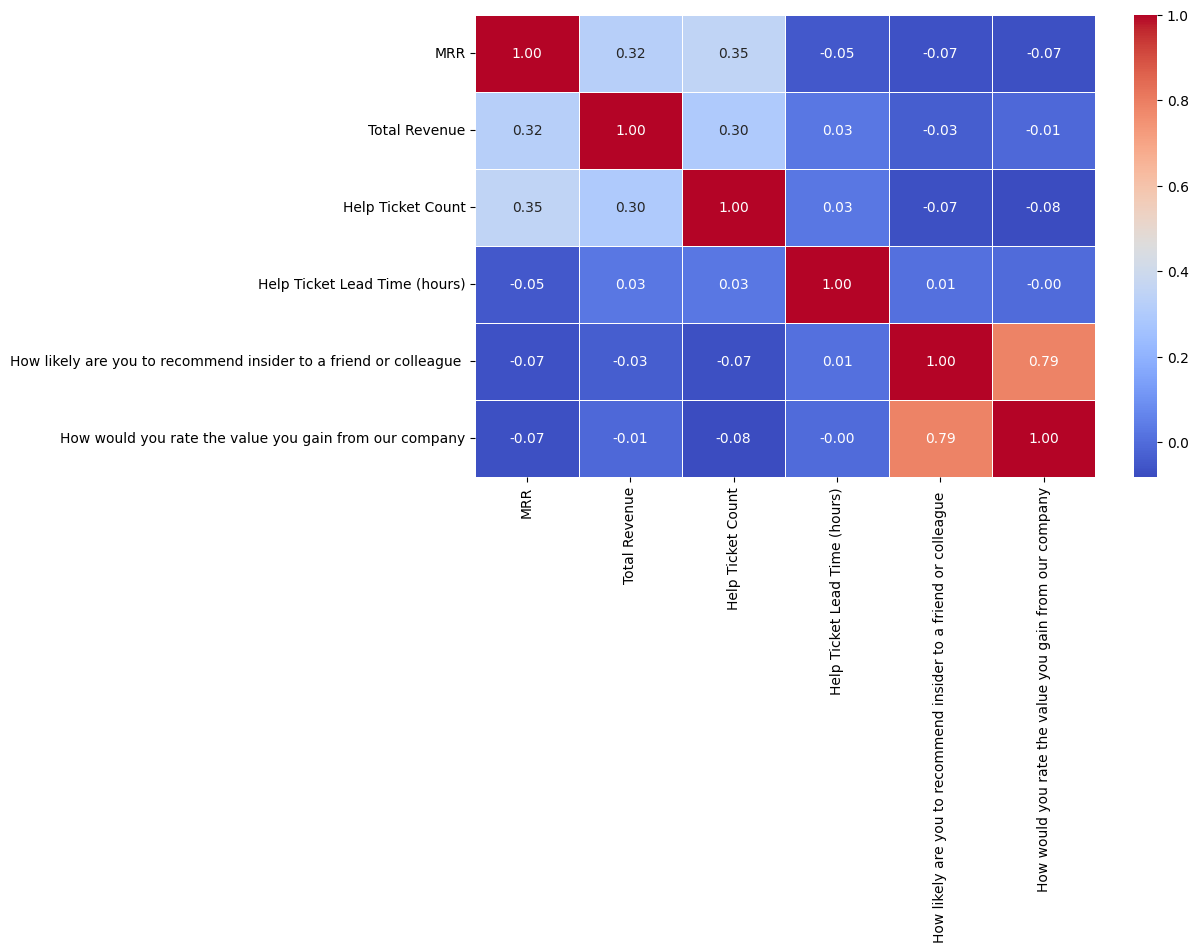

In [25]:
correlation_matrix = merged_df[["MRR", "Total Revenue", "Help Ticket Count", 
                                "Help Ticket Lead Time (hours)", 
                                "How likely are you to recommend insider to a friend or colleague ",
                                "How would you rate the value you gain from our company"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

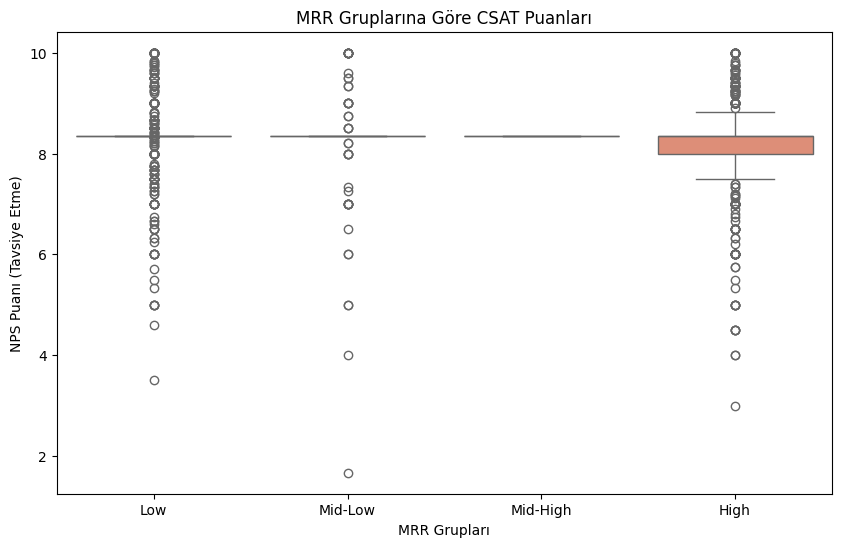

In [28]:
merged_df["MRR Group"] = pd.qcut(merged_df["MRR"], 4, labels=["Low", "Mid-Low", "Mid-High", "High"]) 
plt.figure(figsize=(10, 6))
sns.boxplot(x="MRR Group", y="How likely are you to recommend insider to a friend or colleague ", 
            data=merged_df, hue="MRR Group", legend=False, palette="coolwarm")
plt.title("MRR Gruplarƒ±na G√∂re CSAT Puanlarƒ±")
plt.xlabel("MRR Gruplarƒ±")
plt.ylabel("NPS Puanƒ± (Tavsiye Etme)")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Status", y="How likely are you to recommend insider to a friend or colleague ", data=merged_df, palette="coolwarm", hue="Status", legend=False)
plt.title("Churn vs Aktif M√º≈üteriler i√ßin NPS Puanlarƒ±")
plt.xlabel("M√º≈üteri Durumu (Status)")
plt.ylabel("NPS Skoru (Tavsiye Etme Skoru)")
plt.show()